In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from utils import import_data, get_accuracy, get_accuracy_by_cue, plot_accuracy, plot_accuracy_by_cue, save_fig
from supplemental_data import rule_change, cscheme, cue_names

import datetime
timestamp = datetime.datetime.today().strftime("%Y-%m-%d-%H%M%S")

# Import data
Specify the list of all animals and the directory the csv files are. Choose a subset of animals to work with.

In [2]:
all_animals = [
    'JC240',
    'JC241',
    'JC258',
    'JC267',
    'JC274',
    'JC283',
]

datadir = 'data/'

animals = all_animals[2:]

Import animal data and store them in a dict under animal name.

In [3]:
data = {}

for animal in animals:
    data[animal] = import_data(datadir,
                               animal)

Get the number of training days for each animal.

In [4]:
sessions = {}

for animal in animals:
    sessions[animal] = data[animal]['Session_ID'].unique()

Calculate the accuracy for each training day.

In [5]:
accuracy = {}

for animal in animals:
    accuracy[animal] = get_accuracy(data,
                                    animal)

Get the unique food cues for each experiment. Calculate the accuracy by training day and food cue type.

In [6]:
cues = {}
accuracy_by_cue = {}

for animal in animals:
    cues[animal] = data[animal]['Flavor'].unique()
    accuracy_by_cue[animal] = get_accuracy_by_cue(data,
                                                  animal)

# Plotting

## Plot accuracy for all animals
Toggle between 2-cue or 3-cue (before and after the rule change).

In [7]:
ndays2cue = max(rule_change.values())-1 # x-val is the maximum value of the rule change day minus one day
ndays3cue = np.max(np.concatenate(list(sessions.values()))) # plot max value for all sessions and all animals

In [8]:
def plot_accuracy(data, animal, ndays=None, title='[set title]', background='w', fig=None, ax=None, legend=True):
    """
    Generates plots with animal accuracy over training days.

    Parameters
    ----------
    data : a dictionary of dataframes with data for each animal; *should already specify the animal* (possibly fix later).
    animal : a string with the animal name in JC2xx format.
    ndays : number of days to plot. The default is the length of the data.
    title : the title. If none, will prompt you to set a title.
    fig, ax : In case I want to define externally, otherwise the function will use default settings.

    Returns
    -------
    A plot.

    """
    
    # Default figure settings if not defined
    if fig is None and ax is None:
        fig, ax = plt.subplots(figsize=(22,11))
    elif fig is not None and ax is None:
        ax = fig.add_subplot(111)
    
    # Set number of days to plot and x- and y-lims
    if ndays is None:
        ndays = len(data)
    
    # Title and axis formatting
    ax.set_title(title, fontsize=50, y=1.03)
    ax.set_xlabel("Training day", fontsize=30)
    ax.set_ylabel("Accuracy", fontsize=30)
    
    ax.set_xlim(-0.5,ndays+0.5)
    ax.set_ylim(-5,105)
    
    ax.tick_params(labelsize=30)
    ax.xaxis.set_major_locator(mtick.MultipleLocator(1)) # show each training day on the x-axis
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%')) # format the accuracy on the y-axis
    
    ax.axhline(y = 1/2*100, c='k', ls='--', linewidth=3, zorder=0) # zorder ensures that the line is below the animal accuracy lines
    ax.axhline(y = 1/7*100, c='k', ls='--', linewidth=3, zorder=0) # zorder ensures that the line is below the animal accuracy lines
    ax.yaxis.grid(True)
    ax.set_facecolor(background)
    
    plt.plot(data, color=cscheme[animal], linewidth=4, marker='o', markersize=10, label=animal)
    
    if legend is True:
        ax.legend(loc=2, fontsize=30, framealpha=1)

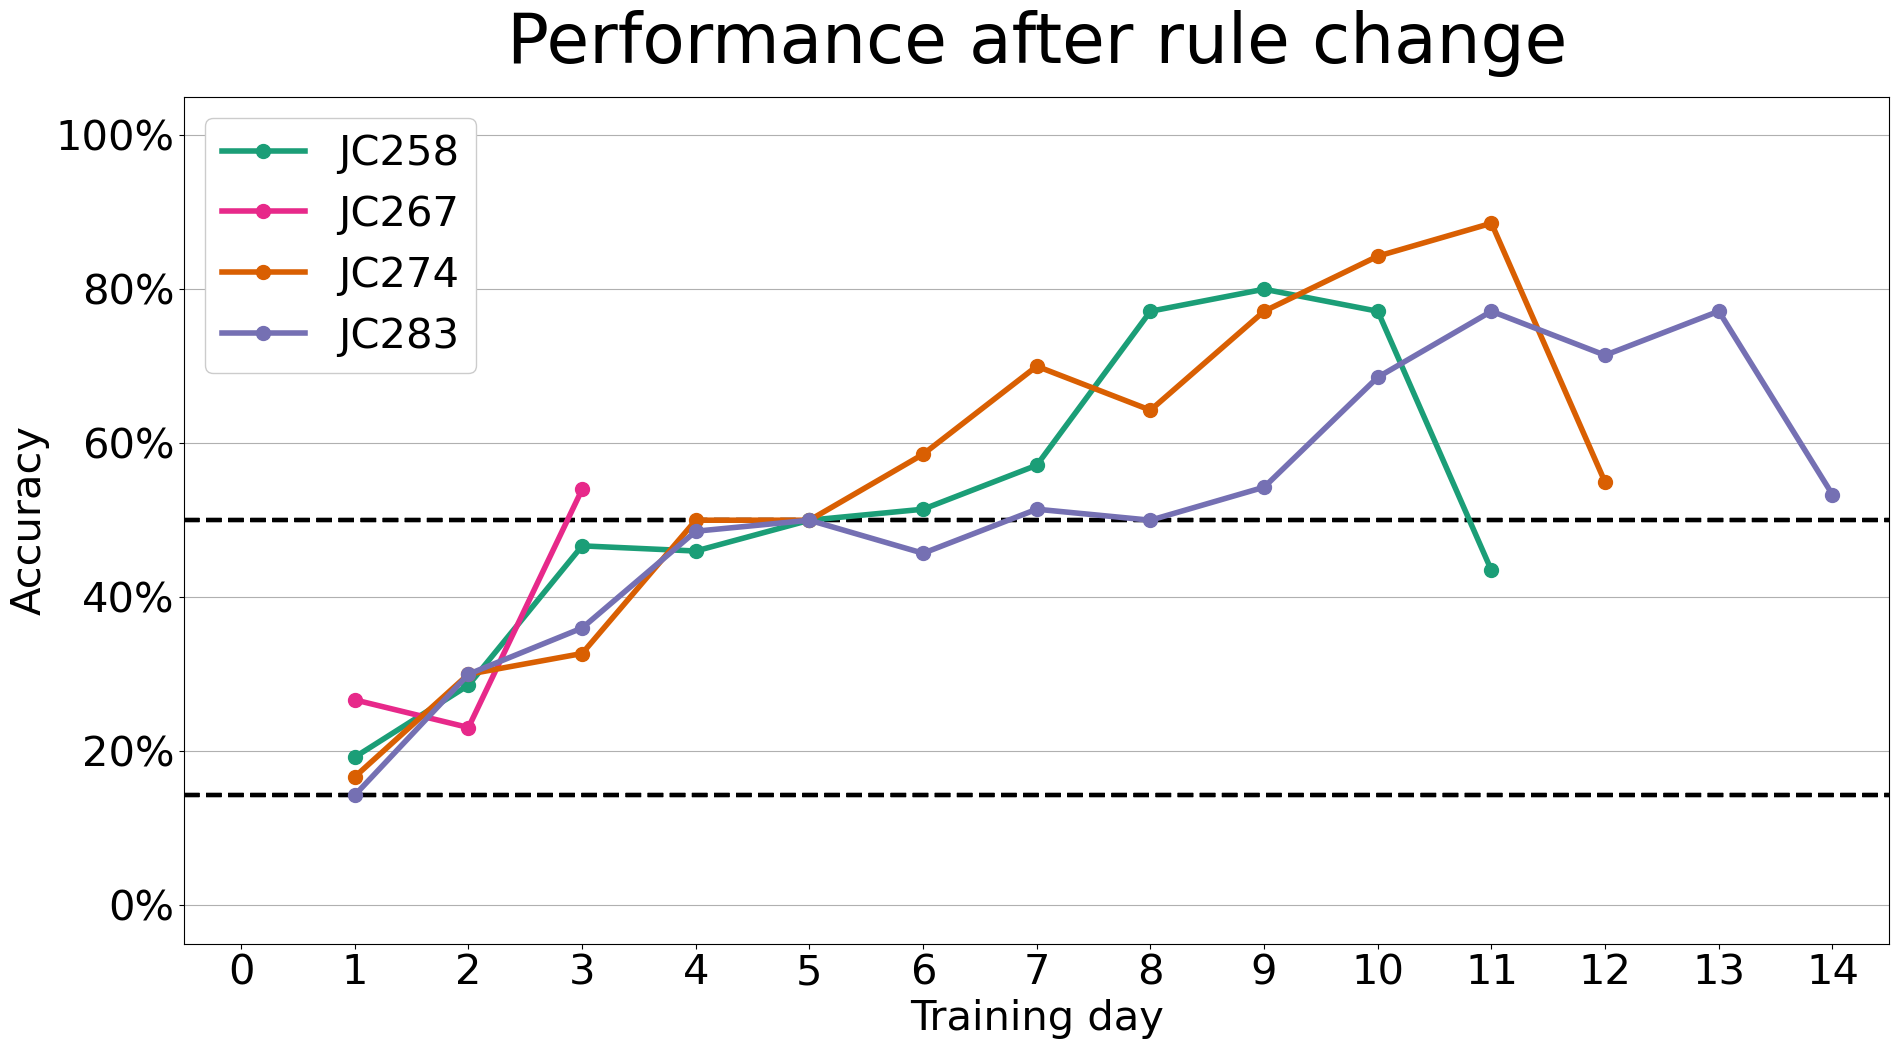

In [9]:
fig, ax = plt.subplots(figsize=(22,11))

for animal in animals:
    
    ############# TOGGLE VARIABLES #################
    # # 2 cues
    # acc = accuracy[animal].iloc[:rule_change[animal]-1] # accuracy before rule change
    # title='Performance before rule change'
    # ndays=ndays2cue
    
    # 3 cues
    acc = accuracy[animal].iloc[:rule_change[animal]] # accuracy after rule change
    title='Performance after rule change'
    ndays=ndays3cue
    
    ################################################
    
    
    plot_accuracy(
        acc,
        animal,
        ndays=ndays,
        title=title,
        fig=fig,
        ax=ax
    )

plt.show()
# save_fig('Performance 2cues', 'svg')

## Plot performance by cue type (all animals)
Toggle between 2-cue or 3-cue (before and after the rule change).

In [10]:
rule_change

{'JC240': 9, 'JC241': 14, 'JC258': 11, 'JC267': 4, 'JC274': 12, 'JC283': 14}

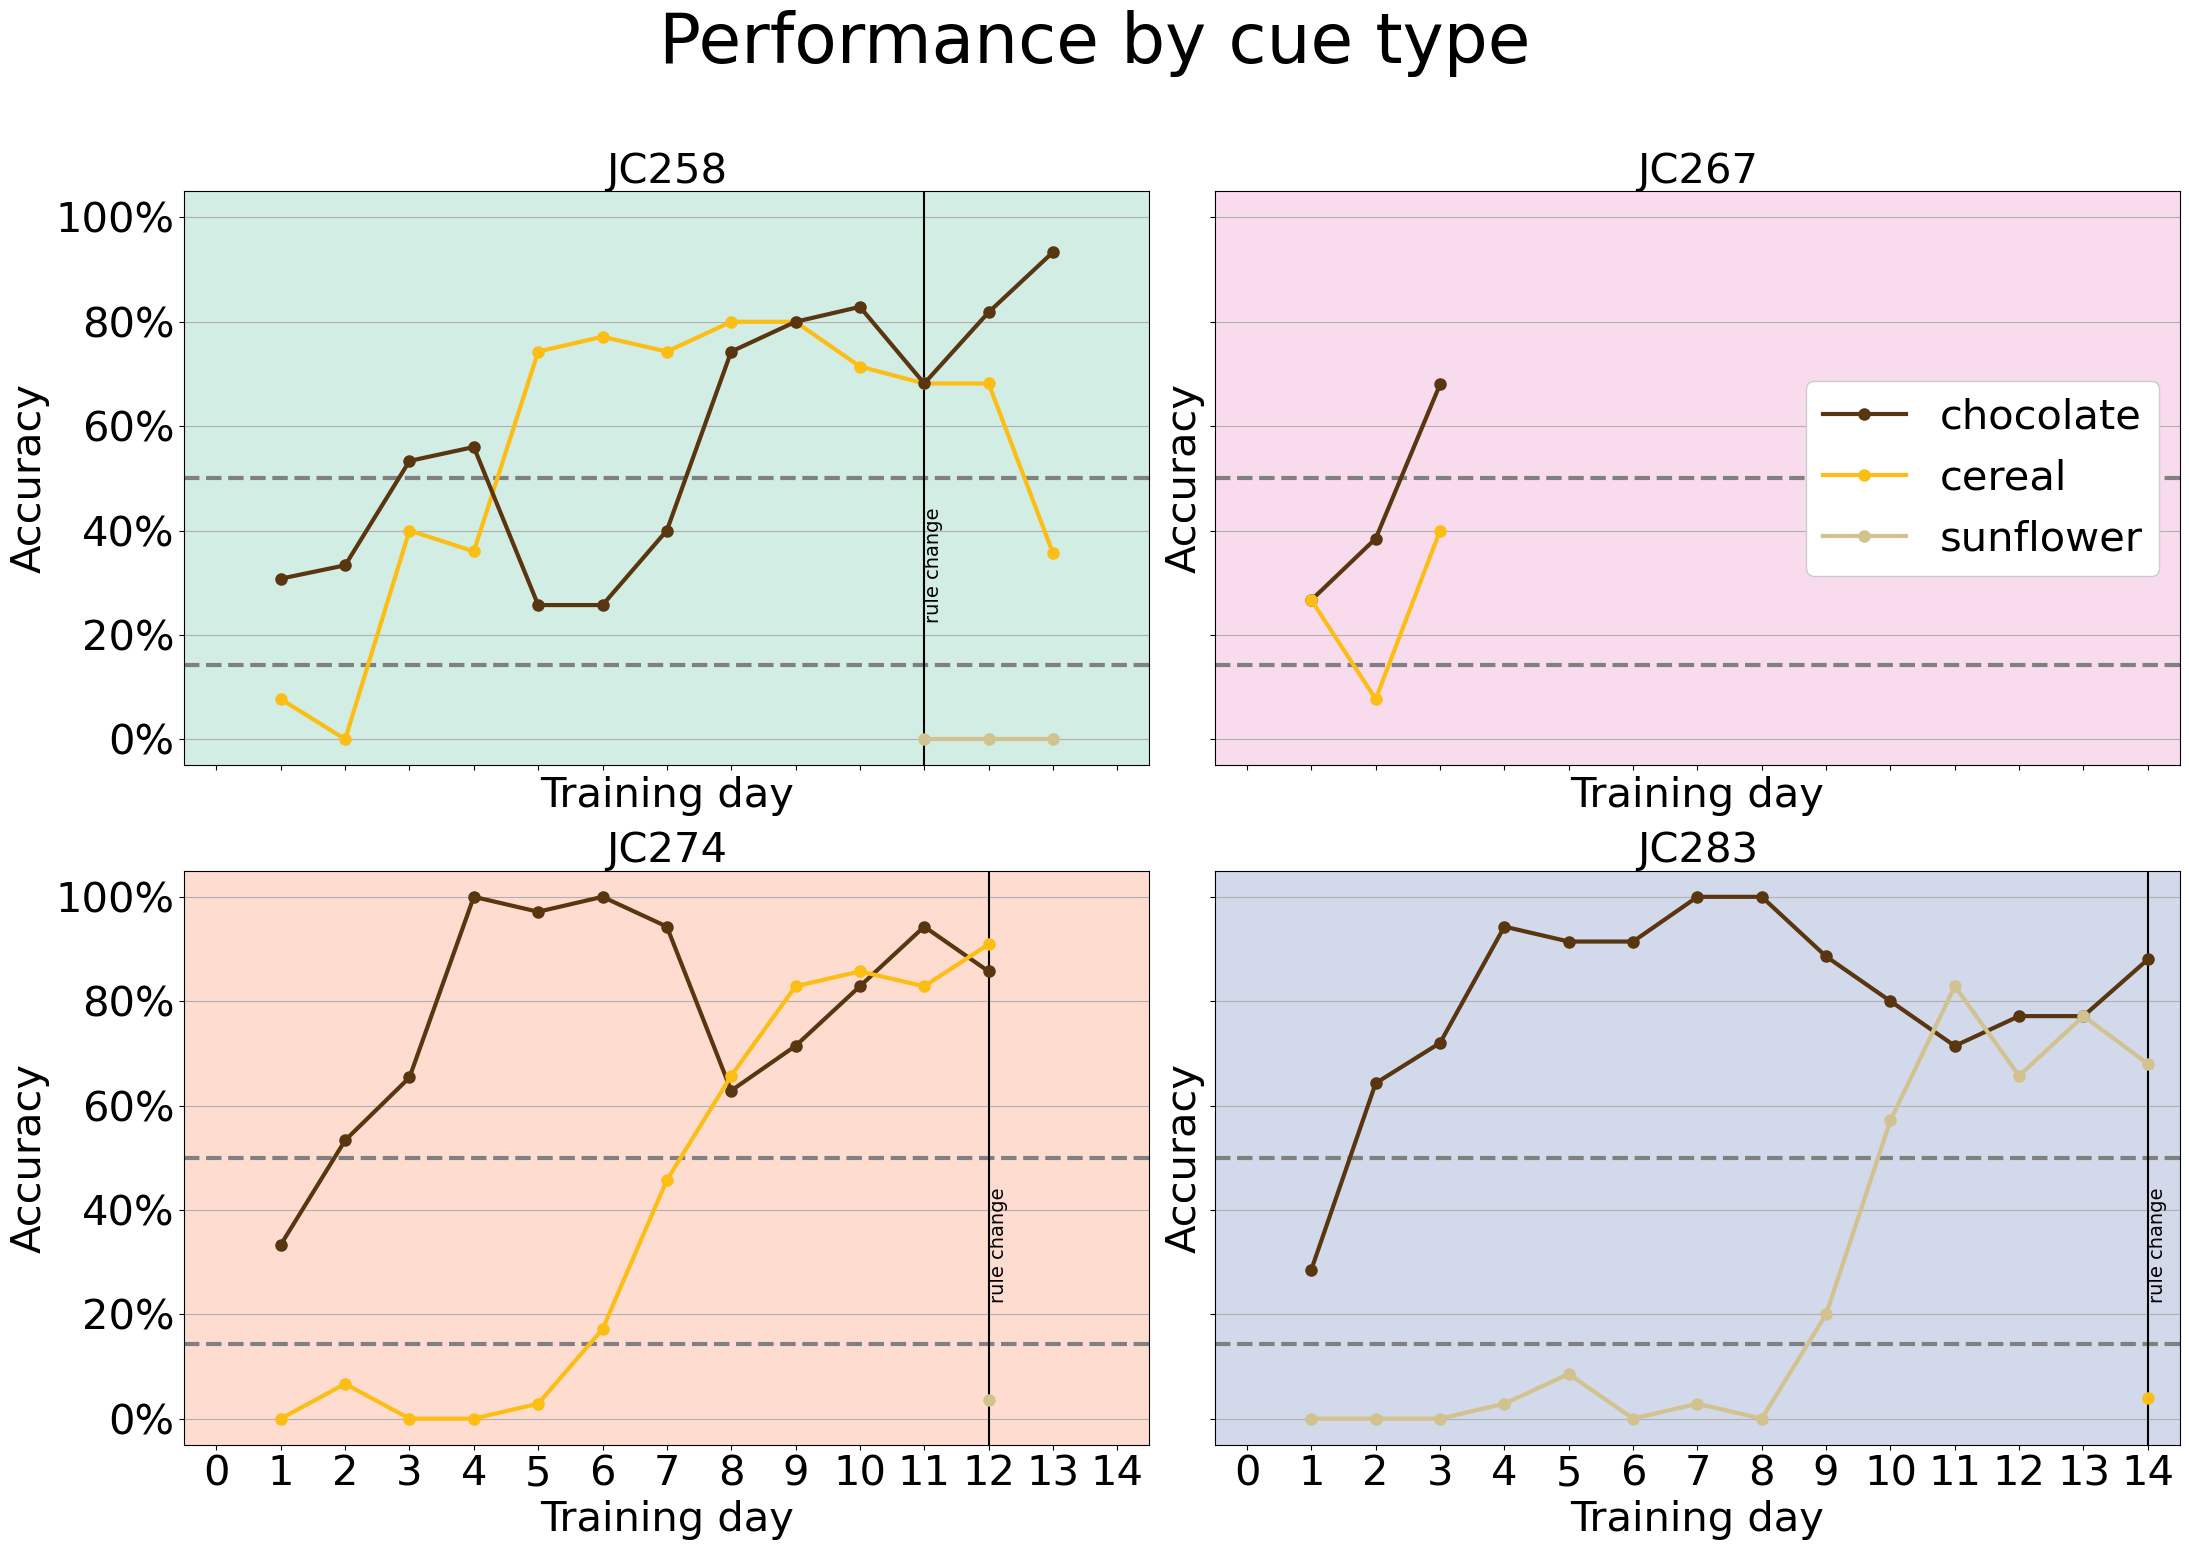

In [19]:
# Make a large plot with 4 subplots
rows, cols = 2, 2
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(22,15))
title='Performance by cue type'
fig.suptitle(title, fontsize=50, y=1.03)

# Iterate over each subplot and plot.
for ax, animal in zip(axes.flatten(), animals):
    
    ############# TOGGLE VARIABLES #################
    # # 2 cue
    # data_by_cue = accuracy_by_cue[animal].loc[:rule_change[animal]-1]
    # ndays=ndays2cue
    # cues_select=cues[animal][:2]
    # rule_ch_line=False
    
    # 3 cue
    data_by_cue = accuracy_by_cue[animal]
    ndays=ndays3cue
    cues_select=cues[animal]
    rule_ch_line=True
    ###############################################
    
    rule_change
    
    plot_accuracy_by_cue(
        data_by_cue=data_by_cue,
        animal=animal,
        cues=cues_select,
        ndays=ndays,
        background=cscheme[animal+'_medium'],
        fig=fig,
        ax=ax,
        rule_ch_line=rule_ch_line,
    )
    
    # Plot legend on JC267 subplot
    if animal == 'JC267':
        legend_handles = []
        for cue, color in cue_names.items():
            legend_handles.append(plt.Line2D([],[], color=color, label=cue, linewidth=3, marker='o', markersize=8))
        ax.legend(handles=legend_handles, loc=7, fontsize=30, framealpha=1)
        
# save_fig('Performance all animals light tint', 'svg')

## Plot performance by cue type (individual animal)
Toggle between 2-cue or 3-cue

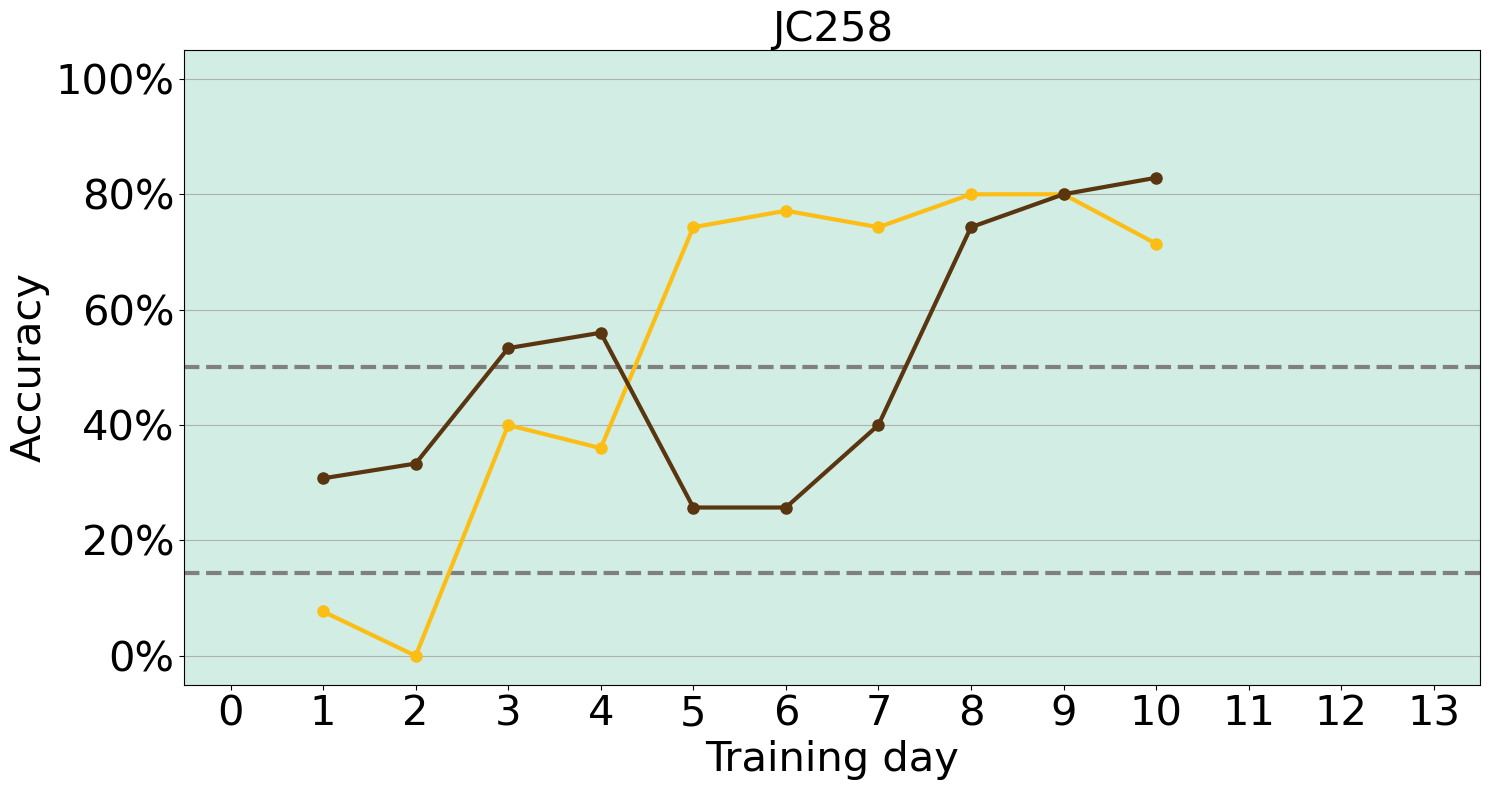

In [12]:
animal='JC258'

############# TOGGLE VARIABLES #################
# 2 cues
data_by_cue = accuracy_by_cue[animal].loc[:rule_change[animal]-1] # accuracy before rule change
ndays=ndays2cue # or rule_change[animal]-1
cues_select=cues[animal][:2]

# # 3 cues
# data_by_cue = accuracy_by_cue[animal]
# ndays=ndays3cue # or len(sessions[animal])
# cues_select=cues[animal]
################################################

plot_accuracy_by_cue(
    data_by_cue=data_by_cue,
    animal=animal,
    cues=cues_select,
    ndays=ndays,
    background=cscheme[animal+'_medium']
                    )

# save_fig(f'Performance {animal}', 'svg')

# Plot failed schema learning with JC240

In [13]:
animal = 'JC240'
data_JC240 = {}
data_JC240[animal] = import_data(datadir, animal)
accuracy_JC240 = get_accuracy(data_JC240, animal)

In [23]:
rule_change[animal]

14

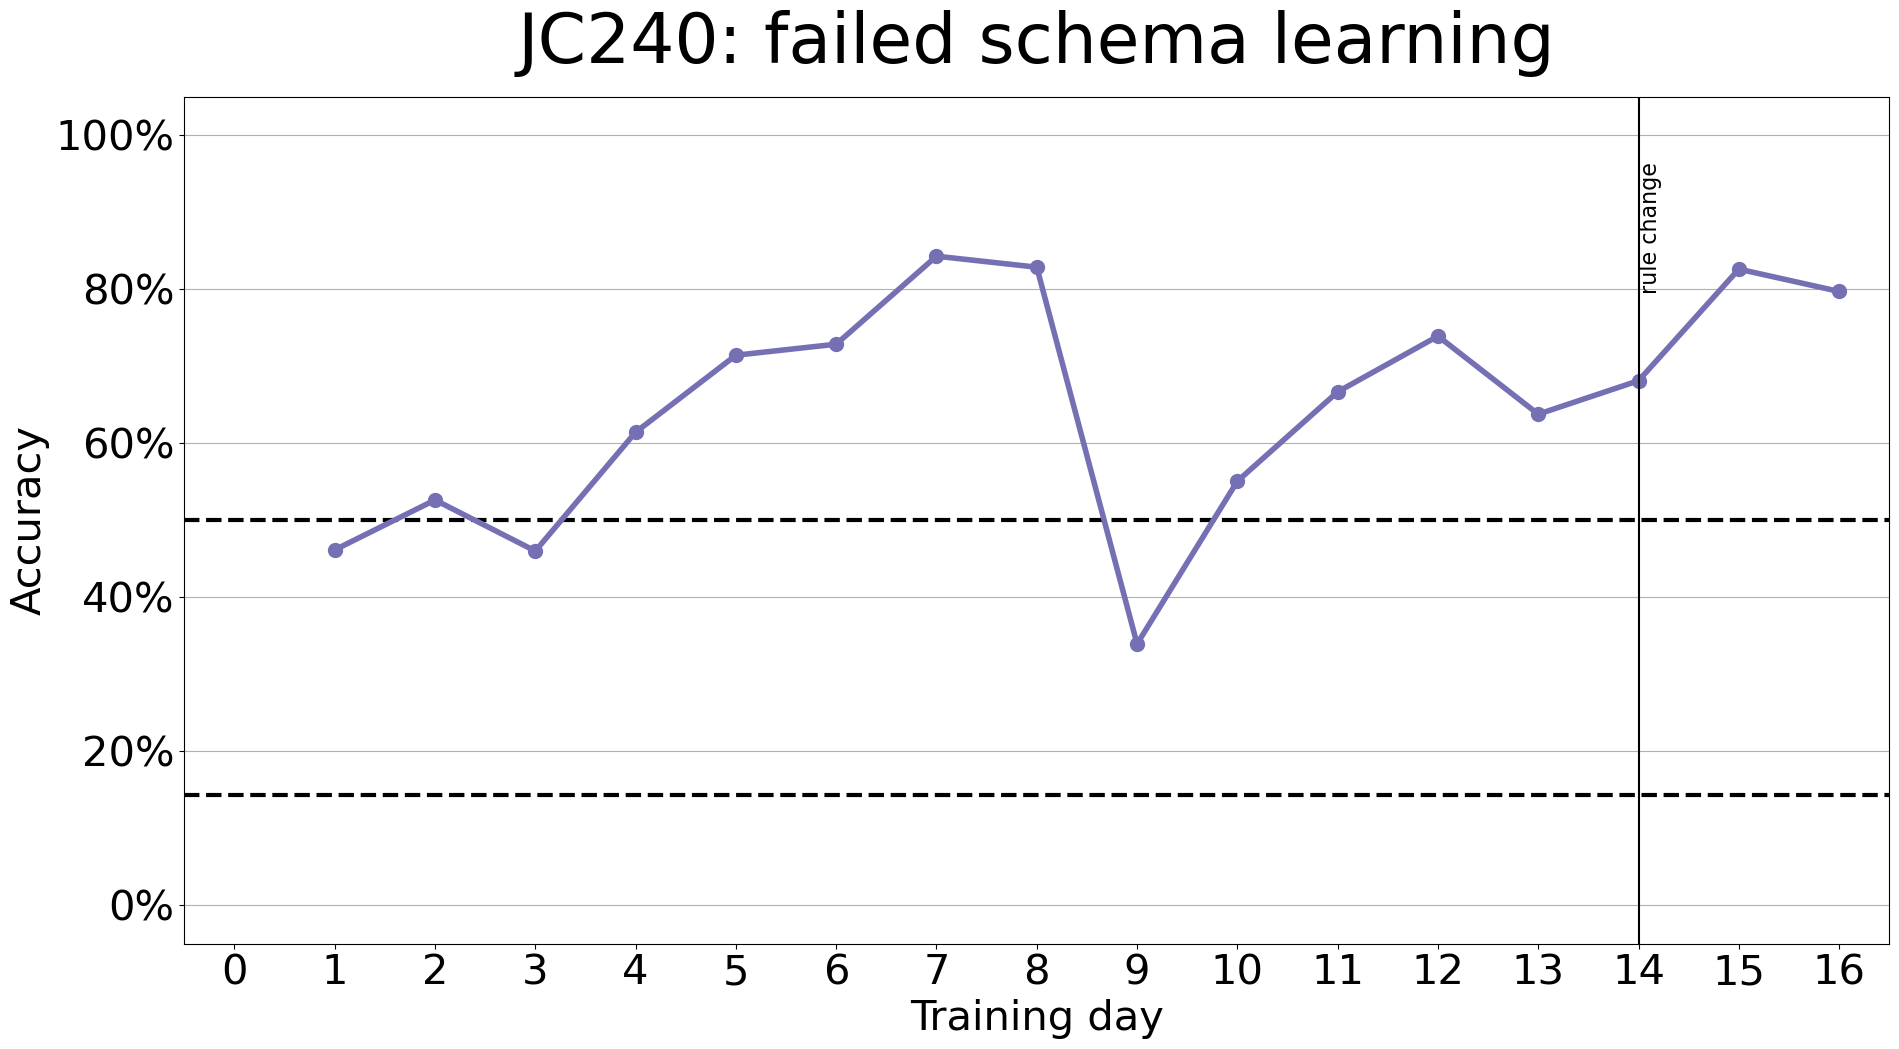

In [21]:
fig, ax = plt.subplots(figsize=(22,11))

plot_accuracy(accuracy_JC240, animal, title="JC240: failed schema learning", fig=fig, ax=ax, legend=False)
ax.axvline(x = rule_change[animal], c='k')
ax.text(rule_change[animal], 80, "rule change", rotation=90, fontsize=16)

plt.show()
# save_fig('JC240 failed schema learning', 'svg')

# Plot arm selection over time